In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 6)

> Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе).

# Бета-распределение

>Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=true).

In [2]:
a = 0.5
b = 0.5
# строим случайную величину с бета-распределением с заданными параметрами
beta_rv = sts.beta(a, b)
# генерируем выборку объема 1000
sample = beta_rv.rvs(size=1000)

In [3]:
sample[:10]

array([ 0.34642105,  0.96016274,  0.725192  ,  0.11734304,  0.58494007,
        0.45870554,  0.69889758,  0.5629054 ,  0.46206119,  0.99640748])

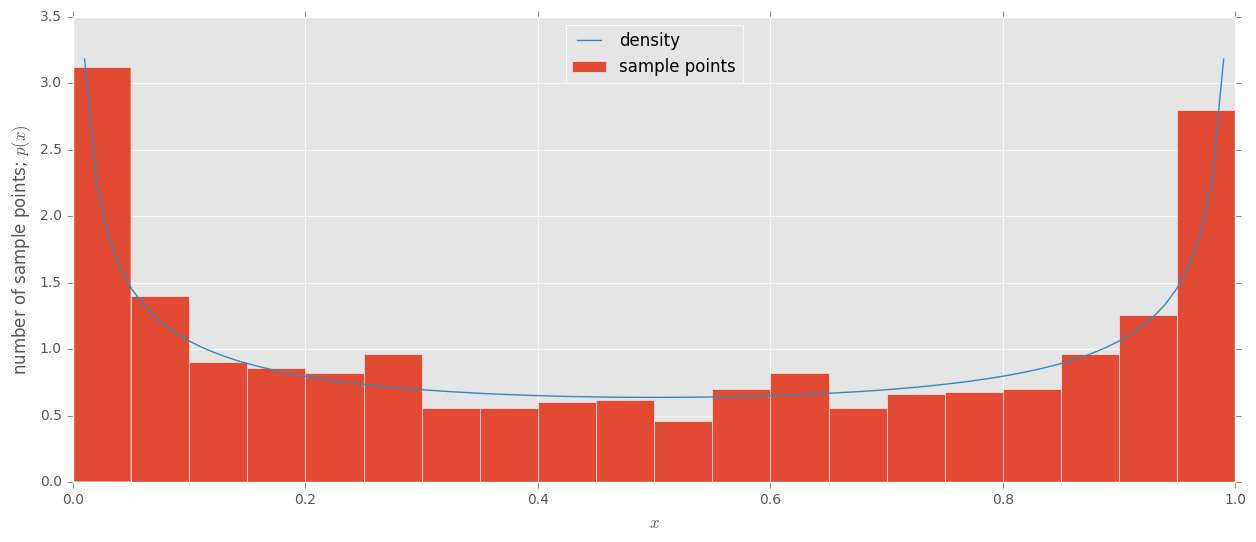

In [4]:
# сначала строим гистограмму выборки
plt.hist(sample, bins=20, normed=True, label='sample points')
# теперь строим график плотности
x = np.linspace(0, 1, 100)
pdf = beta_rv.pdf(x)
plt.plot(x, pdf, label='density')
plt.xlabel('$x$')
plt.ylabel('number of sample points; $p(x)$')
plt.legend(loc='best')
plt.show()

> Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Согласно ЦПТ, выборочное среднее выборки объема $n$ будет иметь распределение, близкое к $N\left(\mu, \frac{\sigma^2}{n}\right)$. Мы рассматриваем бета-распределение с параметрами $\alpha = \beta = 0.5$, поэтому $\mu = \frac{\alpha}{\alpha + \beta} = 0.5$, $\sigma^2 = \frac{\alpha\beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)} = 0.125.$ Таким образом, $\bar{X}_n \longrightarrow N\left(0.5, \frac{0.125}{n}\right)$ по распределению.

In [5]:
def sample_mean_distr(n):
    # создаем массив, в который будем записывать получающиеся выборочные средние
    sample_means = []
    for i in range(1000):
        # генерируем выборку объема n
        sample = beta_rv.rvs(size=n)
        # считаем ее выборочное среднее
        sample_mean = np.sum(sample) / n
        # записываем полученное выборочное среднее в массив выборочных средних
        sample_means.append(sample_mean)
    # строим гистограмму выборочных средних
    plt.hist(sample_means, bins=20, normed=True, label='sample means')
    # теперь строим график плотности соответствующего нормального распределения
    x = np.linspace(np.amin(sample), np.amax(sample), 100)
    # в качестве параметров нормального распределения подставляем вычисленные ранее среднее и дисперсию
    norm_rv = sts.norm(loc=0.5, scale=np.sqrt(0.125 / n))
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='density')
    plt.xlabel('$x$')
    plt.ylabel('number of sample means; p(x)')
    plt.legend(loc='best')
    plt.show()

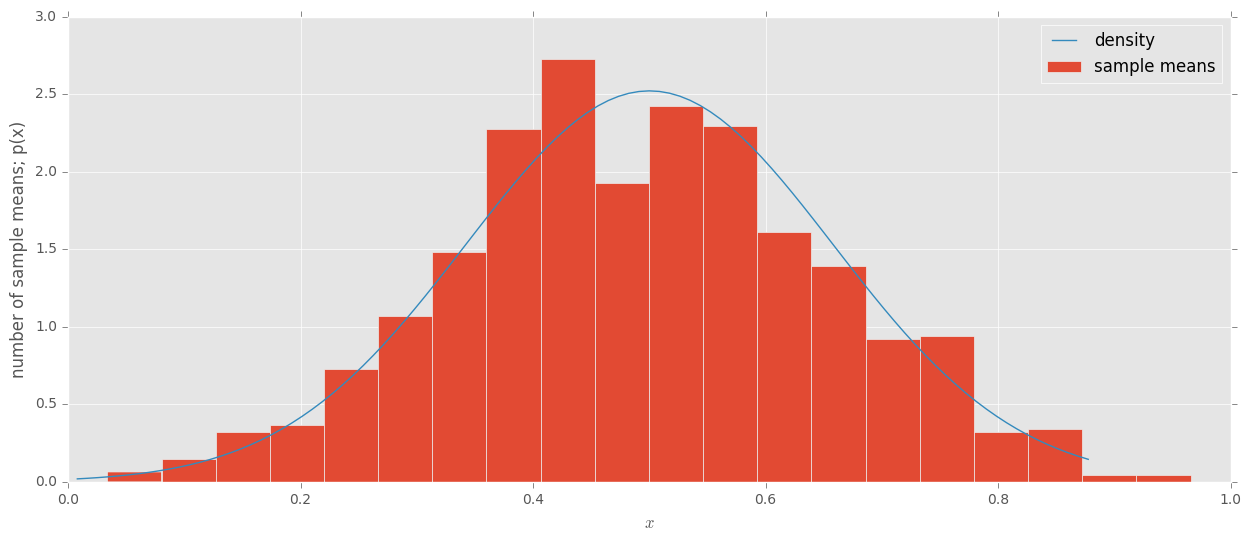

In [6]:
sample_mean_distr(5)

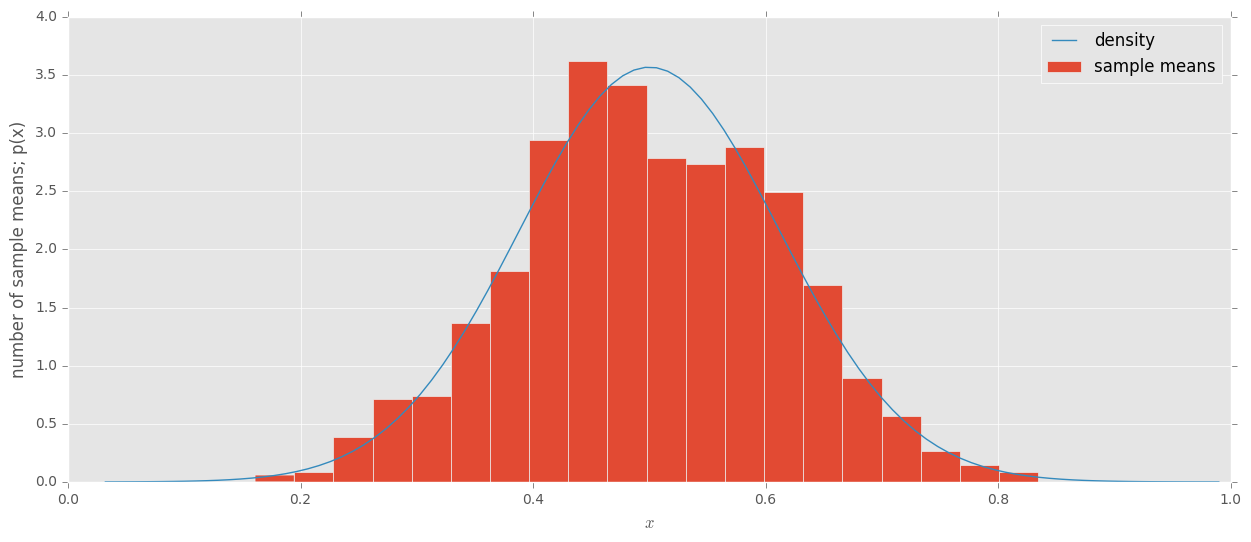

In [7]:
sample_mean_distr(10)

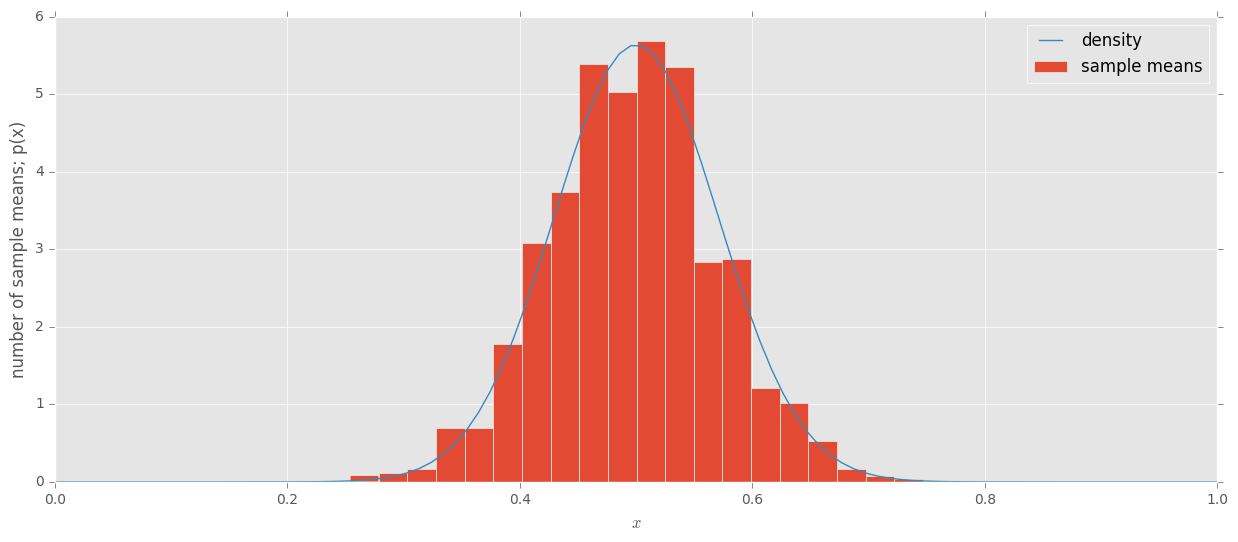

In [8]:
sample_mean_distr(25)

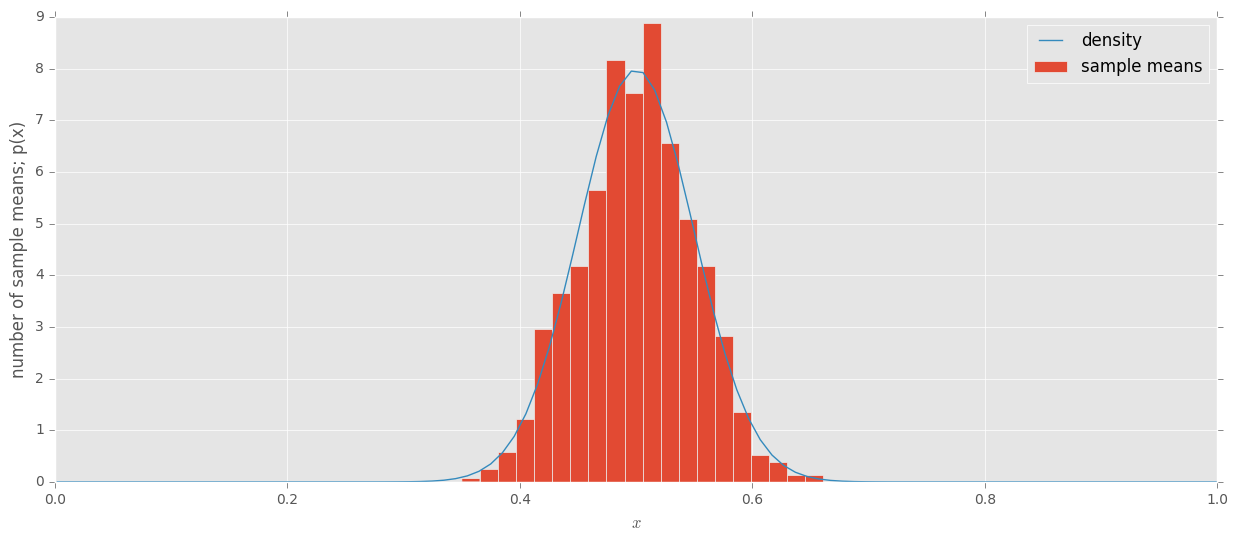

In [9]:
sample_mean_distr(50)

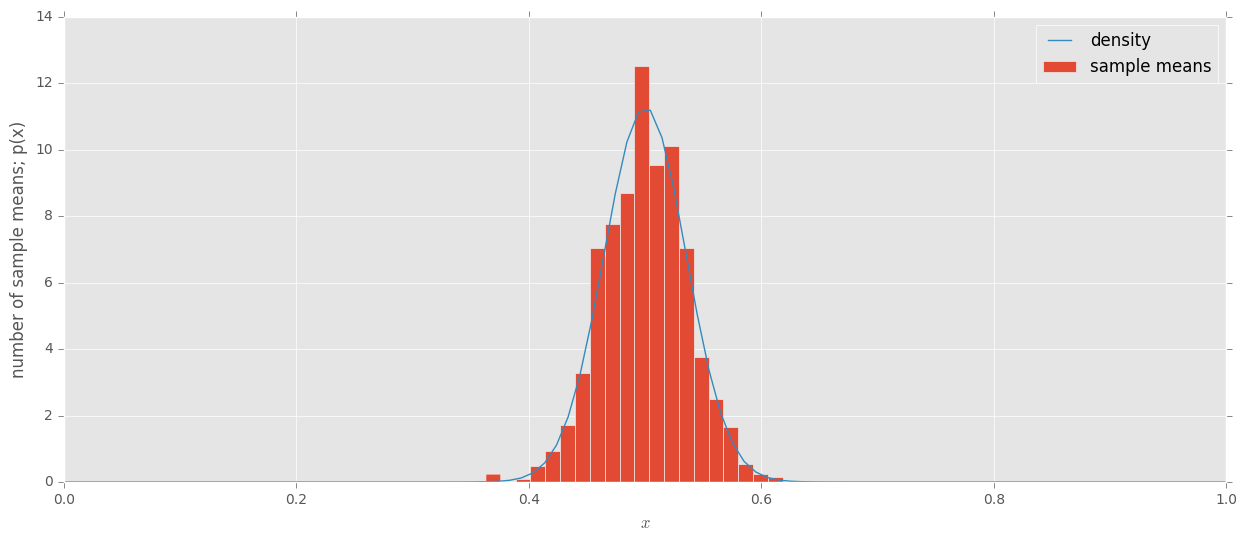

In [10]:
sample_mean_distr(100)

>Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Видно, что ЦПТ работает - действительно, из гистограмм видно, что распределение выборочных средних все больше становится похоже на нормальное с ростом $n$.